# Explorando ferramentas para EDA

__Trabalhando com o dataframe Titanic__

Este dataframe é utilizado em trabalhos iniciais em data science. Neste conjunto de dados, há o status de sobrevivência dos passageiros da embarcação, juntamente com outros dados, como sexo, idade, valor da passagem e muitos outras colunas que formam este dataset.

Importação de bibliotecas:

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Importando os dados titanic.csv, criando o dataframe e apresentando as cinco primeiras linhas com head():

In [63]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Apresentação de dados estatísticos com describe() para as colunas com variaveis quantitativas:

In [64]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Criação de tabela de frequência para contagem e porcentagem de homens e mulheres que estavam na embarcação:

In [65]:
tbl_freq_Sex = pd.DataFrame(df.Sex.value_counts())
tbl_freq_Sex.rename(columns = {'Sex':'freq_abs_Sex'}, inplace = True)
tbl_freq_Sex['freq_relativa_Sex'] = round(tbl_freq_Sex.freq_abs_Sex/tbl_freq_Sex.freq_abs_Sex.sum(),2)
tbl_freq_Sex

,freq_abs_Sex,freq_relativa_Sex
male,577,0.65
female,314,0.35


Gráfico de barras apresentado a distribuição de embarcados por sexo:

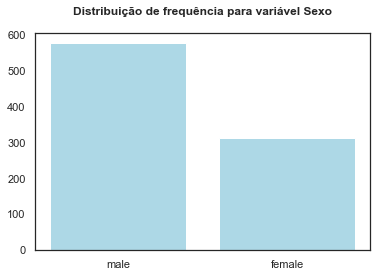

In [66]:
plt.bar(df.Sex.unique(), df.Sex.value_counts(), color = 'lightblue')
plt.title('Distribuição de frequência para variável Sexo\n', {'fontsize': 12,'fontweight': 'bold'})
plt.show()

Gráficos de barra para apresentação de sobrevivência por sexo, tanto em frequência como porcentagem:

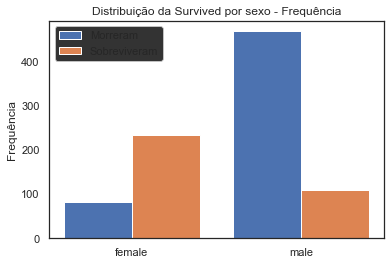

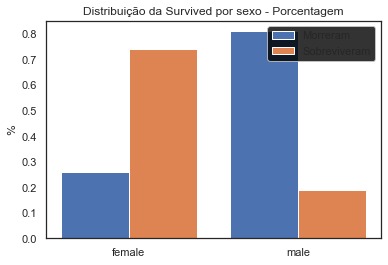

In [67]:
df_Sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack()
df_Sex_pct = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()
labels = list(df_Sex.index)
morreram = df_Sex[0].values
sobreviveram = df_Sex[1].values
morreram_pct = df_Sex_pct[0].values
sobreviveram_pct= df_Sex_pct[1].values
x = np.arange(len(labels))
width = 0.40
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, morreram, width, label='Morreram')
rects2 = ax.bar(x + width/2, sobreviveram, width, label='Sobreviveram')
ax.set_ylabel('Frequência')
ax.set_title('Distribuição da Survived por sexo - Frequência')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()
fig, ax1 = plt.subplots()
rects3 = ax1.bar(x - width/2, morreram_pct, width, label='Morreram')
rects4 = ax1.bar(x + width/2, sobreviveram_pct, width, label='Sobreviveram')
ax1.set_ylabel('%')
ax1.set_title('Distribuição da Survived por sexo - Porcentagem')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
plt.show()

Conversão da coluna Sex para valores quantitativos com a função map():

In [68]:
print(df.Sex[:5])
df.Sex = df.Sex.map({"male":0,"female":1})
print(df.Sex[:5])

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object
0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64


Apresentação do dataframe com os novos valores para a coluna df.sex:

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


Agrupamento de mulheres no df pela coluna df.sex com a função groupby():

In [70]:
df.groupby(by = "Sex")
print(df.groupby(by = "Sex"))
df[df.Sex==1][:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


Agrupamento de homens no df pela coluna df.sex com a função groupby():

In [71]:
df[df.Sex==0][:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S


Remoção de colunas com a função drop() e apresentação do df atualizado:

In [72]:
df = df.drop(["Pclass", "SibSp", "Fare", "Cabin", "Embarked"], axis=1)
df.head()

,PassengerId,Survived,Name,Sex,Age,Parch,Ticket
0,1,0,"Braund, Mr. Owen Harris",0,22.0,0,A/5 21171
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,0,PC 17599
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,STON/O2. 3101282
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,0,113803
4,5,0,"Allen, Mr. William Henry",0,35.0,0,373450


Apresentação da distribuição de sobreviventes e mortos no dataframe:

In [73]:
dist_geral = pd.DataFrame(round(df.Survived.value_counts()/df.shape[0],2))

dist_geral

,Survived
0,0.62
1,0.38


Tabela de porcentagem de sobrevivência por sexo, utilizando a função lambda():

In [74]:
df_sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack()
df_sex_pct = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()
df_sex_pct

,0,1
Sex,,
0,0.811092,0.188908
1,0.257962,0.742038


Avaliação de correlação entre variáveis quantitativas com a função corr() que calcula a corrrelação entre variáveis, considerando o método padrão da função, o coeficiente padrão de correlação de Pearson:

In [75]:
df.corr()

,PassengerId,Survived,Sex,Age,Parch
PassengerId,1.000000,-0.005007,-0.042939,0.036847,-0.001652
Survived,-0.005007,1.000000,0.543351,-0.077221,0.081629
Sex,-0.042939,0.543351,1.000000,-0.093254,0.245489
Age,0.036847,-0.077221,-0.093254,1.000000,-0.189119
Parch,-0.001652,0.081629,0.245489,-0.189119,1.000000


Conforme a matriz apresentada acima, a variável Sex e a variável Survived possuem a maior correlação entre variáveis quantitativas, com o valor de 0,54

_Matriz de Correlação_

Apresentação gráfica da tabela anterior, mostrando a correlação das variáveis numéricas do df:

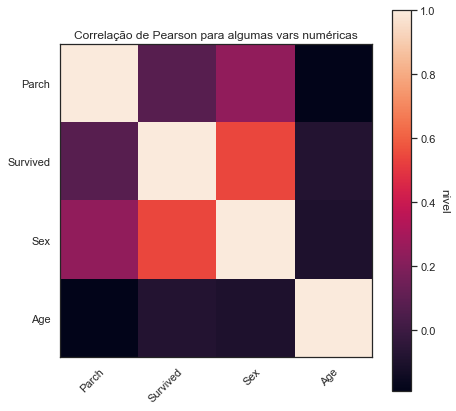

In [76]:
columns = ['Parch','Survived', 'Sex', 'Age']
corrs = df[['Parch','Survived', 'Sex', 'Age']].corr().values
fig, ax = plt.subplots(figsize = [7,7])
im = ax.imshow(corrs)
ax.set_xticks(np.arange(len(columns)))
ax.set_yticks(np.arange(len(columns)))
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Correlação de Pearson para algumas vars numéricas")
cbar = ax.figure.colorbar(im, ax=ax) 
cbar.ax.set_ylabel('nivel', rotation=-90, va="bottom")
plt.show()

# Dataset - Reclamações de consumidor

_fonte_ : https://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1 (Nesse link estão os dicionário de dados, caso possua dúvidas sobre base).
Importação dos dados dadosgovbr---2014.csv, criando o dataframe e apresentando as cinco primeiras linhas com head():

In [77]:
df_rec0 = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")
df_rec0.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
3,Instituto de Promoção e Defesa do Cidadão e Co...,Não identificado,NE,MA,São Luís,F,entre 31 a 40 anos,2014,5,29/05/2014,...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
4,Secretaria de Desenvolvimento Social e Direito...,Não identificado,NE,PE,Recife,M,entre 21 a 30 anos,2014,6,30/06/2014,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1


Alteração de nome com espaço das colunas, removendo os espaços e alterando para underline:

In [78]:
df_rec0.rename(columns = {"Tempo Resposta":"Tempo_Resposta", "Nota do Consumidor":"Nota_Consumidor", "Segmento de Mercado":"Segmento_Mercado", "Como Comprou Contratou":"Como_Comprou_Contratou",\
                         "Interação do Gestor":"Interacao_Gestor","Interação do Gestor":"Interacao_Gestor",\
                         "Nome Fantasia":"Nome_Fantasia", "Grupo Problema":"Grupo_Problema",\
                         "Nome Fantasia": "Nome_Fantasia", "Ano Abertura":"Ano_Abertura","Mes_Abertura":"Mês_Abertura","Canal de Origem":"Canal_Origem","Prazo Analise Gestor":"Prazo_Analise_Gestor","Faixa Etária":"Faixa_Etária","Avaliação Reclamação":"Avaliação_Reclamação"}, inplace = True)

#### Criação de função para pré-processamento de dados para missing values.

Para as variáveis numéricas, a função valida se a linha possui algum Nan (Not a Number), se sim, a função atribui a média para este campo.

Para as variáveis categóricas, a função valida se a linha possui algum Nan (Not a Number), se sim, a função atribui a moda para este campo, de acordo com a respectiva coluna.

In [99]:
def preprocessamento(df_rec, cols_numericas, cols_categoricas):
    df_rec_cl = df_rec0.copy()
    temp = (df_rec.isnull().sum() / df_rec.shape[0]) >= 0.8
    variaveis_80percFaltantes = temp.loc[temp == True].index.tolist()
    for v in variaveis_80percFaltantes:
        df_rec_cl = df_rec_cl.drop(v, axis = 1)
        
    cols_numericas = list(set(cols_numericas).intersection(set(df_rec_cl.columns.tolist())))
    cols_categoricas = list(set(cols_categoricas).intersection(set(df_rec_cl.columns.tolist())))
        
    for v in cols_numericas:
        mean_value = round(df_rec_cl[v].mean())
        df_rec_cl[v] = df_rec_cl[v].fillna(mean_value)
        
    for v in cols_categoricas:
        mode_v = df_rec_cl[v].value_counts().idxmax()
        df_rec_cl[v] = df_rec_cl[v].fillna(mode_v)
    return df_rec_cl

df_rec = preprocessamento(df_rec = df_rec0, 
                            cols_numericas = ['Prazo_Analise_Gestor', 'Tempo_Resposta', 'Nota_Consumidor'], 
                            cols_categoricas = ['Data Resposta', 'Hora Resposta', 'Data Análise', 'Hora Análise', 'Data Recusa', 'Hora Recusa', 'Nota_Consumidor','Análise da Recusa', 'Avaliação_Reclamação'])
df_rec

,Gestor,Canal_Origem,Região,UF,Cidade,Sexo,Faixa_Etária,Ano_Abertura,Mês Abertura,Data Abertura,...,Problema,Como_Comprou_Contratou,Procurou Empresa,Respondida,Situação,Avaliação_Reclamação,Nota_Consumidor,Edição de Conteúdo,Interacao_Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Cobrança de compra/saque não reconhecido,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,3.0,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Não entrega / demora na entrega do produto,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Dificuldade / atraso na devolução de valores p...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,N,N,1
3,Instituto de Promoção e Defesa do Cidadão e Co...,Não identificado,NE,MA,São Luís,F,entre 31 a 40 anos,2014,5,29/05/2014,...,"Dados pessoais ou financeiros consultados, col...",Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,N,N,1
4,Secretaria de Desenvolvimento Social e Direito...,Não identificado,NE,PE,Recife,M,entre 21 a 30 anos,2014,6,30/06/2014,...,Cobrança por serviço/produto não contratado / ...,Internet,S,S,Finalizada não avaliada,Não Avaliada,3.0,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43982,Instituto de Defesa do Consumidor - Procon,Plataforma Web,CO,DF,Brasília,M,entre 31 a 40 anos,2014,12,01/12/2014,...,Não entrega / demora na entrega do produto,Internet,S,S,Finalizada não avaliada,Não Avaliada,3.0,N,N,1
43983,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,São Bernardo do Campo,M,entre 31 a 40 anos,2014,11,30/11/2014,...,Oferta não cumprida / serviço não fornecido/ v...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,N,N,1
43984,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,São Paulo,M,entre 31 a 40 anos,2014,12,26/12/2014,...,Produto danificado / não funciona - Falta de a...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,N,N,1
43985,Departamento de Proteção e Defesa do Consumido...,Plataforma Web,S,RS,Dona Francisca,M,mais de 70 anos,2014,12,09/12/2014,...,Dificuldade de contato / demora no atendimento,Loja física,S,S,Finalizada não avaliada,Não Avaliada,3.0,N,N,1


In [102]:
df_rec = df_rec.drop(["Ano_Abertura", "Total"], axis=1)

Tabela de Correlação das variáveis quantitativas:

In [103]:
df_rec.corr()

,Mês Abertura,Tempo_Resposta,Nota_Consumidor
Mês Abertura,1.000000,-0.034339,0.058876
Tempo_Resposta,-0.034339,1.000000,-0.157703
Nota_Consumidor,0.058876,-0.157703,1.000000


#### Quantidade de reclamações por UF

Visando entender melhor o público de reclamações, foi criada a tabela de frequência e porcentagem abaixo, estratificando as reclamações por estado:

In [80]:
tbl_freq_UF = pd.DataFrame(df_rec.UF.value_counts())
tbl_freq_UF.rename(columns = {'UF':'freq_abs_UF'}, inplace = True)
tbl_freq_UF['freq_relativa_UF %'] = round((tbl_freq_UF.freq_abs_UF/tbl_freq_UF.freq_abs_UF.sum()*100),2)
tbl_freq_UF.rename(columns = {"freq_abs_UF":"Frequência", "freq_relativa_UF %":"%"}, inplace = True)
tbl_freq_UF

,Frequência,%
SP,11882,27.01
PR,6140,13.96
RJ,4907,11.16
MG,4186,9.52
BA,2443,5.55
RS,1941,4.41
DF,1805,4.10
PE,1626,3.70
SC,1458,3.31
MA,1082,2.46


#### Quantidade de reclamações por sexo

Visando entender melhor o público de reclamações, foi criada a tabela de frequência e porcentagem abaixo, estratificando as reclamações por sexo:

In [81]:
tbl_freq_Sexo = pd.DataFrame(df_rec.Sexo.value_counts())
tbl_freq_Sexo.rename(columns = {'Sexo':'freq_abs_Sexo'}, inplace = True)
tbl_freq_Sexo['freq_relativa_Sexo %'] = round((tbl_freq_Sexo.freq_abs_Sexo/tbl_freq_Sexo.freq_abs_Sexo.sum()*100),2)
tbl_freq_Sexo.rename(columns = {"freq_abs_Sexo":"Frequência", "freq_relativa_Sexo %":"%"}, inplace = True)
tbl_freq_Sexo

,Frequência,%
M,27895,63.42
F,16092,36.58


**Análise**: 63,42% das reclamações são provenientes do público masculino e 36,58% são provenientes do público feminino.

Avaliação de correlação entre tempo de resposta e a nota do consumidor:

In [82]:
var_global_rec = np.var(df_rec.Nota_Consumidor)
var_categ_rec = df_rec.groupby('Tempo_Resposta').apply(lambda x: np.var(x.Nota_Consumidor))
total_categ_rec = df_rec.Tempo_Resposta.value_counts()
var_rec = (total_categ_rec[0] * var_categ_rec[0] + total_categ_rec[1]* var_categ_rec[1])/ (total_categ_rec[0] + total_categ_rec[1])
r_quad_rec = (var_global_rec - var_rec)/ var_global_rec;
print("O r-quadrado para Tempo Resposta e Nota Consumidor é:", round(r_quad_rec*100,2), ". O R² apresentado indica baixa predição da variável tempo de resposta, o que reflete na baixa relação entre ambas.")

O r-quadrado para Tempo Resposta e Nota Consumidor é: -7.38 . O R² apresentado indica baixa predição da variável tempo de resposta, o que reflete na baixa relação entre ambas.


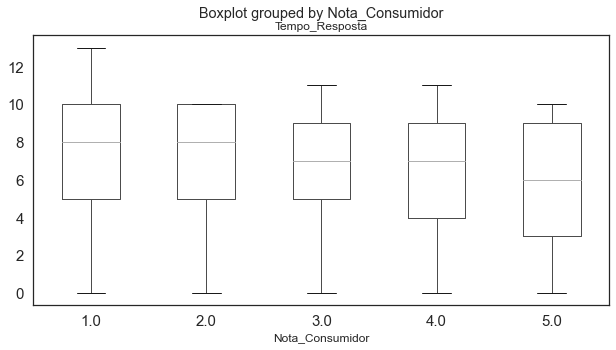

In [83]:
df_rec.boxplot(column= 'Tempo_Resposta', by = 'Nota_Consumidor',fontsize=15,figsize=[10,5],grid = False )
plt.show()

Conforme o boxplot acima, mostra-se que independente da nota do consumidor, o tempo de resposta não sofre grande variação.

#### Proporção de reclamações registradas e não respondidas.

In [84]:
tbl_freq_rr = pd.DataFrame(df_rec.Respondida.value_counts())
tbl_freq_rr.rename(columns = {'Respondida':'freq_abs'}, inplace = True)
tbl_freq_rr['freq_relativa'] = round((tbl_freq_rr.freq_abs/tbl_freq_rr.freq_abs.sum()*100),2)
tbl_freq_rr.rename(columns = {"freq_abs":"Frequência", "freq_relativa":"%"}, inplace = True)
tbl_freq_rr

,Frequência,%
S,41961,95.39
N,2026,4.61


**Análise reclamações por segmento**

Caso o ministério buscasse focar em algum segmento para reduzir a quantidade de reclamações abertas, buscar reduzir as reclamações no ramo de telecomunicações poderia trazer um impacto positivo ao indicador geral, visto que este setor possui quase a metade (45,39%) das reclamações recebidas:

In [85]:
tbl_freq_area = pd.DataFrame(df_rec.Área.value_counts())
tbl_freq_area.rename(columns = {'Área':'freq_abs_area'}, inplace = True)
tbl_freq_area['freq_relativa_area'] = round((tbl_freq_area.freq_abs_area/tbl_freq_area.freq_abs_area.sum()*100),2)
tbl_freq_area.rename(columns = {"freq_abs_area":"Frequência", "freq_relativa_area":"%"}, inplace = True)
tbl_freq_area

,Frequência,%
Telecomunicações,19965,45.39
Serviços Financeiros,9364,21.29
Produtos de Telefonia e Informática,7047,16.02
Produtos Eletrodomésticos e Eletrônicos,3656,8.31
Demais Produtos,2312,5.26
Transportes,477,1.08
Demais Serviços,402,0.91
Saúde,257,0.58
Turismo/Viagens,243,0.55
Alimentos,116,0.26


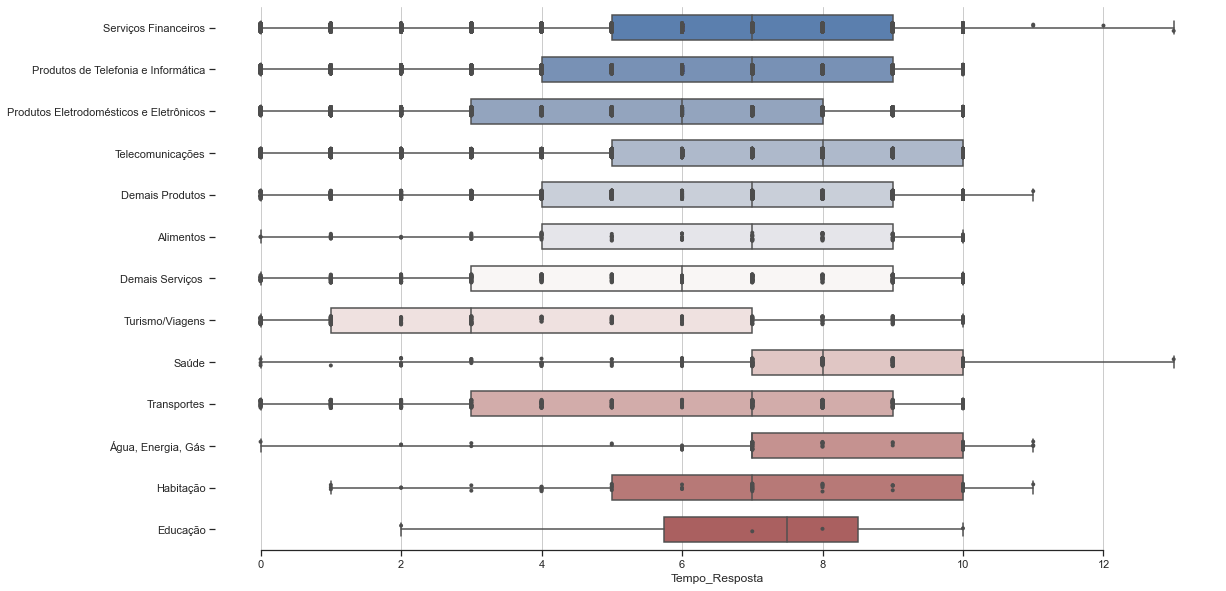

In [86]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(18, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Tempo_Resposta", y="Área", data=df_rec,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="Tempo_Resposta", y="Área", data=df_rec,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

**Análise de Área**: Concentrando 45,39% das reclamações, o setor de Telecomunicações possui o maior volume de reclamações. Com os gráficos de boxplot, não há indícios de relação entre tempo de atendimento por Área de atuação por empresa reclamada.

**Análise de faixa etária**

Caso o ministério buscasse entender sobre o público que mais gera reclamações, a tabela abaixo demonstra as faixas etárias e as frequências e porcentagem de reclamações de acordo com a categoria:

In [87]:
tbl_freq_fe = pd.DataFrame(df_rec.Faixa_Etária.value_counts())
tbl_freq_fe.rename(columns = {'Faixa_Etária':'freq_abs_fe'}, inplace = True)
tbl_freq_fe['freq_relativa_fe'] = round((tbl_freq_fe.freq_abs_fe/tbl_freq_fe.freq_abs_fe.sum()*100),2)
tbl_freq_fe.rename(columns = {"freq_abs_fe":"Frequência", "freq_relativa_fe":"%"}, inplace = True)
tbl_freq_fe

,Frequência,%
entre 31 a 40 anos,16741,38.06
entre 21 a 30 anos,9154,20.81
entre 41 a 50 anos,8364,19.01
entre 51 a 60 anos,5542,12.60
entre 61 a 70 anos,2973,6.76
mais de 70 anos,1199,2.73
até 20 anos,14,0.03


__Gráfico para avaliação__ do tempo de resposta de acordo com a faixa etária:

C:\Users\andrew\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\andrew\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


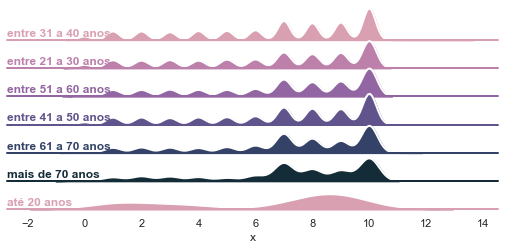

In [89]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
rs = df_rec
x = df_rec.Tempo_Resposta
g = df_rec.Faixa_Etária
df = pd.DataFrame(dict(x=x, g=g))
pal = sns.cubehelix_palette(start=2.3, rot=.7, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "x")
g.fig.subplots_adjust(hspace=-.15)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

**Análise**: O comportamento do tempo de resposta entre idades segue um comportamento similar, concluindo-se que o tempo de resposta não varia de acordo com a faixa etária do reclamante.